In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [104]:
RESULTS_DIR = "results/2025_08_09_232105" # Adjust to your results directory

print("Loading:", RESULTS_DIR + "/experiment_summary.csv")

Loading: results/2025_08_09_232105/experiment_summary.csv


In [105]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
display(summary.head())

,variant,seed,episode,return
0,Fixed,0,1,23340.582335
1,Fixed,0,2,33052.989797
2,Fixed,0,3,36766.522730
3,Fixed,0,4,41038.991372
4,Fixed,0,5,41977.897755


## Mean Discounted Return pro Episode

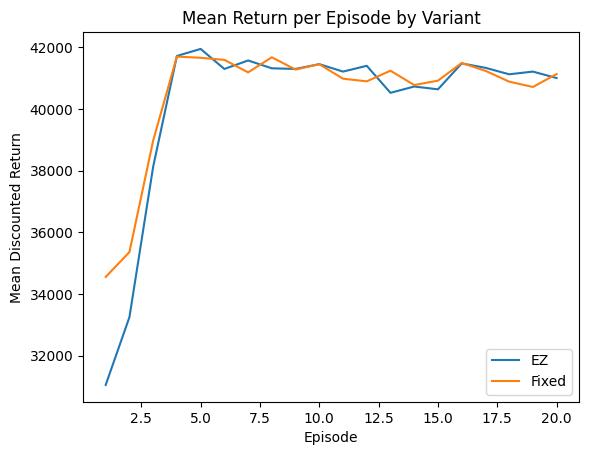

In [106]:

plt.figure()
for variant, grp in summary.groupby("variant"):
    mean_ret = grp.groupby("episode")["return"].mean()
    plt.plot(mean_ret.index, mean_ret.values, label=variant)
plt.xlabel("Episode")
plt.ylabel("Mean Discounted Return")
plt.title("Mean Return per Episode by Variant")
plt.legend()
plt.show()

## Return-Distributions

<Figure size 640x480 with 0 Axes>

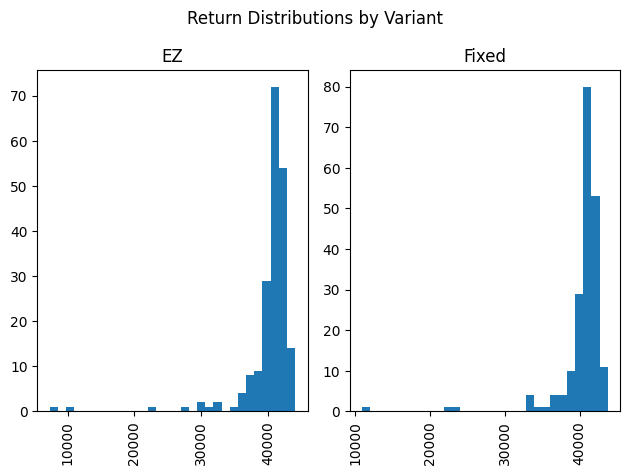

In [107]:
plt.figure()
summary.hist(column="return", by="variant", bins=30)
plt.suptitle("Return Distributions by Variant")
plt.tight_layout()
plt.show()

## Risk, Age & Region Distribution

In [108]:
summary = pd.read_csv(f"{RESULTS_DIR}/experiment_summary.csv")
variants = summary["variant"].unique()
seeds    = summary["seed"].unique()


>>> Sample der angenommenen Profiles für Variante 'Fixed':
   episode  step  profile_idx  action  age  region  risk_score
0        1    67          175       1   65       4    0.152008
1        1    68          464       1   59       1    0.814224
2        1    74          148       1   79       0    0.933769
3        1    75          279       1   53       3    0.568184
4        1    76         1995       1   66       1    0.721998 



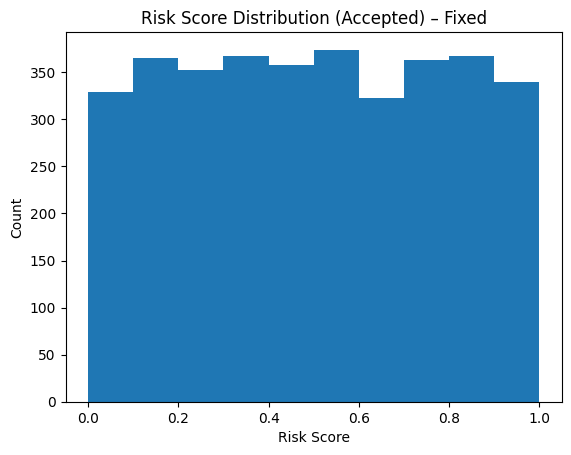

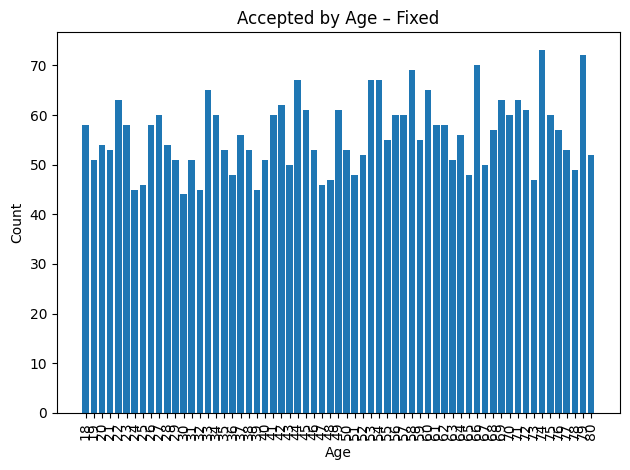

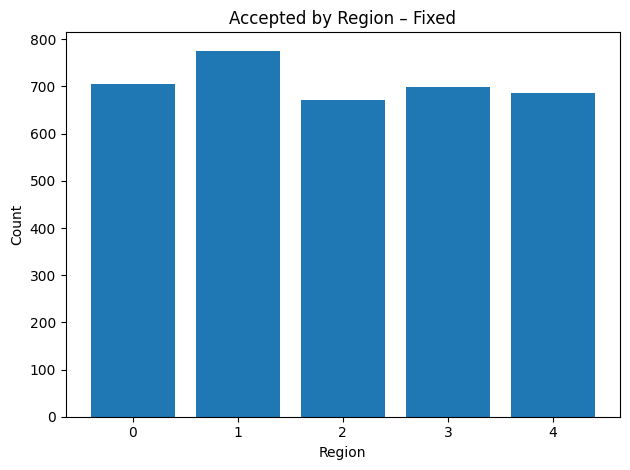


>>> Sample der angenommenen Profiles für Variante 'EZ':
   episode  step  profile_idx  action  age  region  risk_score
0        1    67          634       1   39       1    0.191406
1        1    68          505       1   58       0    0.041558
2        1    75         1086       1   19       0    0.414585
3        1    76          148       1   79       0    0.933769
4        1   208         1662       1   55       0    0.166138 



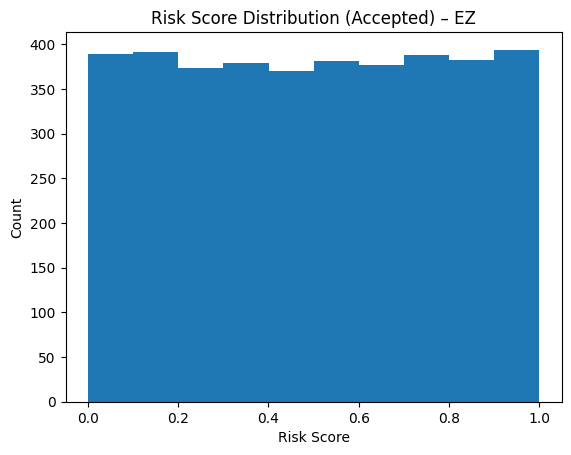

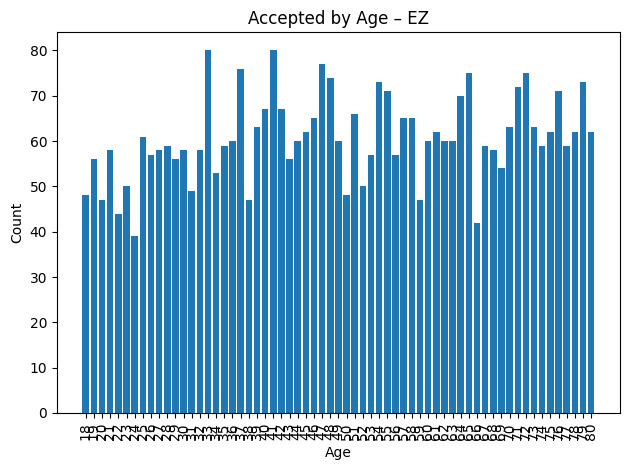

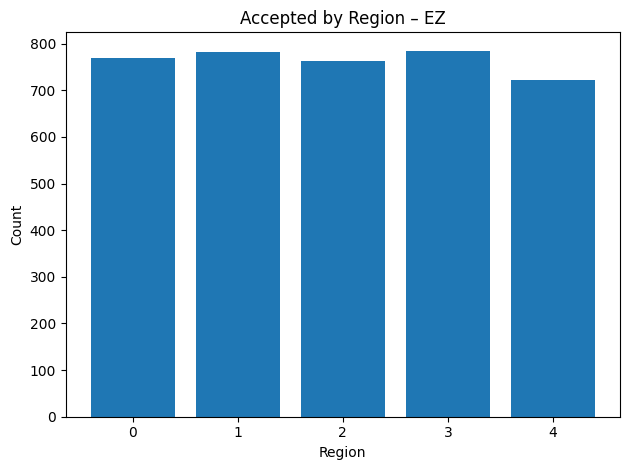

In [109]:
for variant in variants:
    # Liste sammeln über alle Seeds
    accepted_all = []
    for seed in seeds:
        # Profile und Aktionen pro Run laden
        prof_df = pd.read_csv(f"{RESULTS_DIR}/profiles_{variant}_{seed}.csv")
        act_df  = pd.read_csv(f"{RESULTS_DIR}/actions_{variant}_{seed}.csv")
        # Mergen, dann nur Akzeptierte filtern
        merged  = act_df.merge(prof_df, on="profile_idx")
        accepted = merged[merged["action"] == 1]
        accepted_all.append(accepted)
    # Alles zusammenführen
    accepted_df = pd.concat(accepted_all, ignore_index=True)
    
    # ---- Ausgabe: Sample-Tabelle ----
    print(f"\n>>> Sample der angenommenen Profiles für Variante '{variant}':")
    print(accepted_df.head(), "\n")

    # ---- Plot 1: Risikoscore-Verteilung ----
    plt.figure()
    plt.hist(accepted_df["risk_score"], bins=10)
    plt.title(f"Risk Score Distribution (Accepted) – {variant}")
    plt.xlabel("Risk Score")
    plt.ylabel("Count")
    plt.show()

    # ---- Plot 2: Akzeptanzen nach Alter ----
    plt.figure()
    age_counts = accepted_df["age"].value_counts().sort_index()
    plt.bar(age_counts.index.astype(str), age_counts.values)
    plt.title(f"Accepted by Age – {variant}")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # ---- Plot 3: Akzeptanzen nach Region ----
    plt.figure()
    region_counts = accepted_df["region"].value_counts().sort_index()
    plt.bar(region_counts.index.astype(str), region_counts.values)
    plt.title(f"Accepted by Region – {variant}")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()